In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [6]:
df = pd.read_csv('product.csv')

(8471220, 8)

In [7]:
df.shape

(8471220, 8)

In [9]:
df.dtypes

order_id        object
user_id         object
page_id         object
product         object
site_version    object
time            object
title           object
target           int64
dtype: object

In [8]:
df[:3]

,order_id,user_id,page_id,product,site_version,time,title,target
0,cfcd208495d565ef66e7dff9f98764da,c81e728d9d4c2f636f067f89cc14862c,6f4922f45568161a8cdf4ad2299f6d23,sneakers,desktop,2019-01-11 09:24:43,banner_click,0
1,c4ca4238a0b923820dcc509a6f75849b,eccbc87e4b5ce2fe28308fd9f2a7baf3,4e732ced3463d06de0ca9a15b6153677,sneakers,desktop,2019-01-09 09:38:51,banner_show,0
2,c81e728d9d4c2f636f067f89cc14862c,eccbc87e4b5ce2fe28308fd9f2a7baf3,5c45a86277b8bf17bff6011be5cfb1b9,sports_nutrition,desktop,2019-01-09 09:12:45,banner_show,0


In [53]:
df['date']= pd.to_datetime(df['time']).dt.date

In [54]:
df['date'][:3]

0    2019-01-11
1    2019-01-09
2    2019-01-09
Name: date, dtype: object

**EDA**

In [35]:
gb_products = df.groupby('product')[['user_id']].count().reset_index()
gb_site_version = df.groupby('site_version')[['user_id']].count().reset_index()
gb_banner = df.groupby('title')[['user_id']].count().reset_index()

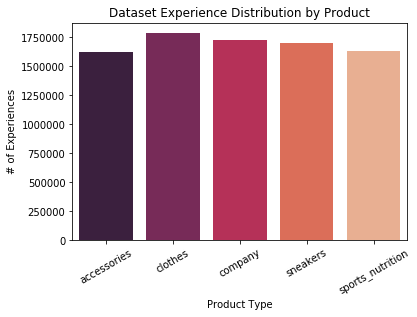

In [43]:
fig = plt.figure()
ax = sns.barplot(x = 'product', y = 'user_id', data = gb_products, palette='rocket')
ax.set(xlabel = 'Product Type', ylabel = '# of Experiences')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.set_title('Dataset Experience Distribution by Product')
plt.show()

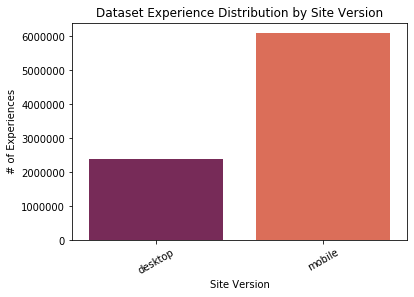

In [44]:
fig = plt.figure()
ax = sns.barplot(x = 'site_version', y = 'user_id', data = gb_site_version, palette='rocket')
ax.set(xlabel = 'Site Version', ylabel = '# of Experiences')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.set_title('Dataset Experience Distribution by Site Version')
plt.show()

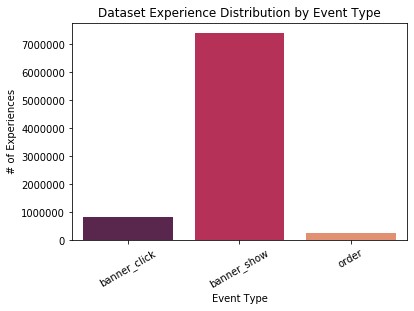

In [45]:
fig = plt.figure()
ax = sns.barplot(x = 'title', y = 'user_id', data = gb_banner, palette='rocket')
ax.set(xlabel = 'Event Type', ylabel = '# of Experiences')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.set_title('Dataset Experience Distribution by Event Type')
plt.show()

In [55]:
gb_time = df.groupby('date')[['user_id']].count().reset_index(level=0)

In [56]:
gb_time

,date,user_id
0,2019-01-01,33131
1,2019-01-02,35626
2,2019-01-03,38202
3,2019-01-04,40614
4,2019-01-05,42751
...,...,...
146,2019-05-27,53679
147,2019-05-28,50029
148,2019-05-29,47063
149,2019-05-30,43050


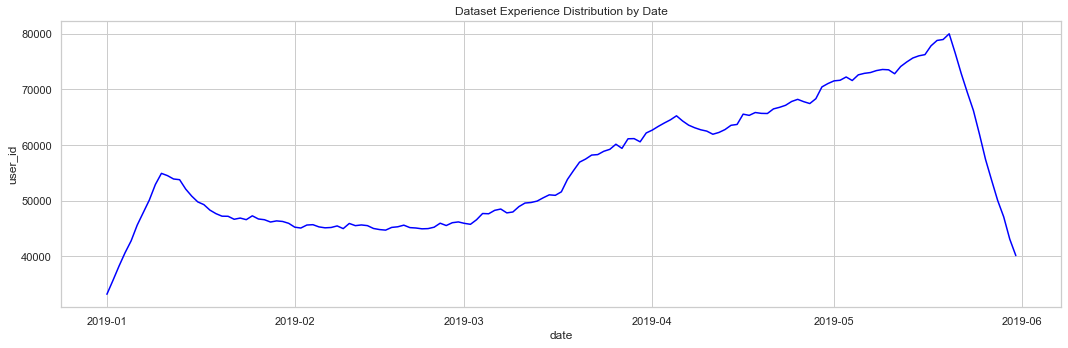

In [65]:
sns.set(style="whitegrid")

fig = plt.figure(figsize = (15,5))
ax = sns.lineplot(x="date", y="user_id",data=gb_time, color = 'blue')
ax.set_title('Dataset Experience Distribution by Date')


plt.tight_layout()
plt.show()

**Modeling**

In [70]:
X = df.drop(columns='target',axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [76]:
model = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state = 0)
